 ## Outliers Detection and removal using Standard Deviation and Z-Score

In this notebook, I am using bhp.csv (Bangalore Housing data) datasets to detect outlier in the price_per_sqft column and remove them.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

## Dataset

In [2]:
price = pd.read_csv('bhp.csv')

In [3]:
price.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
price.shape

(13200, 7)

## Histogram

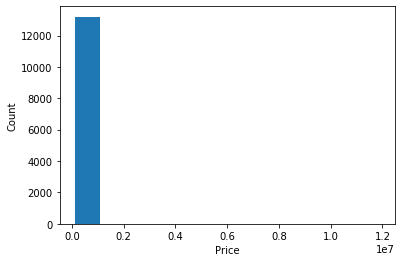

In [5]:
plt.hist(price['price_per_sqft'], bins=10, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

From above we can see that this dataset has outliers. There is only one bar with more than 12000 data points but there are data points that have higher value for price per sqft but count of these data points is very small as compared to 12000 hence we are not able to any bar for these data points.
We will see log scale to make visualization little better

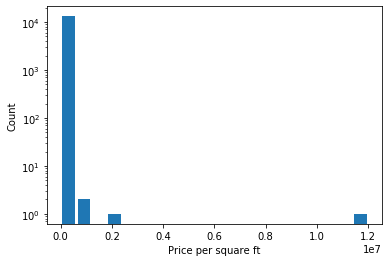

In [6]:
plt.hist(price['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## See outliers using Percentile

In [32]:
lower_limit, upper_limit = price['price_per_sqft'].quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [33]:
outliers = price[(price['price_per_sqft']>upper_limit) | (price['price_per_sqft']<lower_limit)]
outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [9]:
outliers.shape

(28, 7)

In [10]:
price_no_outliers = price[(price['price_per_sqft']>lower_limit) & (price['price_per_sqft'] < upper_limit)]

In [11]:
price_no_outliers.shape

(13172, 7)

In [12]:
price_no_outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
price_no_outliers['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

## Standard Deviation

In [14]:
upper = price_no_outliers['price_per_sqft'].mean() + 4*price_no_outliers['price_per_sqft'].std()
upper

23227.73653589429

In [15]:
lower = price_no_outliers['price_per_sqft'].mean() - 4*price_no_outliers['price_per_sqft'].std()
lower

-9900.429065502549

In [16]:
outliers_std = price_no_outliers[(price_no_outliers['price_per_sqft']>upper) | (price_no_outliers['price_per_sqft']<lower)]
outliers_std.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666


In [17]:
outliers_std.shape

(125, 7)

In [18]:
new_price_no_outliers = price_no_outliers[(price_no_outliers['price_per_sqft']<upper) & (price_no_outliers['price_per_sqft']>lower)]
new_price_no_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


## Histogram after removing outliers

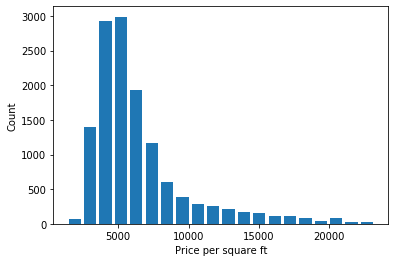

In [19]:
plt.hist(new_price_no_outliers['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

## Histogram with distribution curve

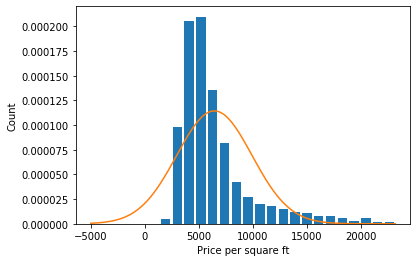

In [20]:
plt.hist(new_price_no_outliers['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-5000, new_price_no_outliers['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng,new_price_no_outliers['price_per_sqft'].mean(),new_price_no_outliers['price_per_sqft'].std()))

## Z-Score

In [24]:
price_no_outliers['zscore'] = (price_no_outliers['price_per_sqft']-price_no_outliers['price_per_sqft'].mean())/price_no_outliers['price_per_sqft'].std()
price_no_outliers.head()

/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [25]:
zoutliers = price_no_outliers[(price_no_outliers['zscore']  < -4) | (price_no_outliers['zscore'] > 4)]
zoutliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725


In [26]:
zoutliers.shape

(125, 8)

As we can see that we removed 125 outliers. The result would be exactly same as 4 standard deviation.